## Implementation of the Metropolis-Hastings MCMC Algorithm

The Metropolis-Hastings algorithm samples a probability distribution to yield a set of traces that are **proportional** to the original distribution. (This answer)[] on Stack Exchange describes it really well.

> 
I think there's a nice and simple intuition to be gained from the (independence-chain) Metropolis-Hastings algorithm.

> First, what's the goal? The goal of MCMC is to draw samples from some probability distribution without having to know its exact height at any point. The way MCMC achieves this is to "wander around" on that distribution in such a way that the amount of time spent in each location is proportional to the height of the distribution. If the "wandering around" process is set up correctly, you can make sure that this proportionality (between time spent and height of the distribution) is achieved.


We'll implement it in two dimensions, for the sake of visualizing how the algorithm works

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)
plt.style.use('ggplot')

First, let's create and plot an arbitrary target distribution

In [4]:
target = np.append(np.random.normal(300,60,40000),
                   np.random.normal(600,100,30000))

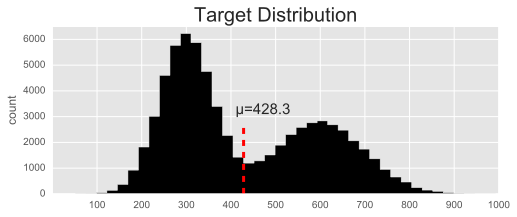

In [18]:
plt.rcParams['figure.figsize'] = 8, 3
plt.hist(target, bins=40, histtype='stepfilled', color='black')
plt.title('Target Distribution', fontsize=20)
plt.ylabel('count')
plt.xlim([0,1000])
plt.ylim([0,6500])
plt.xticks(range(100,1001, 100))
plt.text(410,3100, u'µ={:.4}'.format(np.mean(target)), fontsize=15)
_ = plt.axvline(x= np.mean(target), ymax=.4, color='red', linewidth=3, linestyle='--')
# plt.savefig('test.png', format='png', dpi=800)

Now let's write out the algorithm. Note that we bin the original data to calculate the probability at a given point. Here's a rough idea of how the algorithm works

- Choose a random position on the distribution
- Propose a new position on the distribution
- If the proposed position has a higher relative probability than the current one, jump to it (i.e. set current_position to new_position)
- If not, *maybe still jump*. The probability of still jumping is proportional to how much lower the probability of the new position is
- Return all of the locations the algorithm has been to

In [10]:
def get_traces(d, n_samples):

    data = d.astype(int)
    probs = np.bincount(data) # yields an array of counts per in range (i,i+1)
    traces = np.array([])
    
    current = int(np.random.uniform(data.min(), data.max() - 1))
    for i in xrange(n_samples):
        traces = np.append(traces, current)
        # eventually create a function that chooses a good jumping distance
        # If the p is low for the current position, make the jump bigger
        proposed = int(np.random.normal(current, 120))
        # ensures we don't leave the bounds
        while proposed > data.max() or proposed < data.min():
            proposed = int(np.random.normal(current, 120))

        a = (float(probs[proposed]) / (probs[current]+.001)) # so we're not dividing by 0
        if a > 1:
            current = proposed
        else:
            if np.random.random() <= a:
                current = proposed
    return traces

In [11]:
traces = get_traces(target, 5000)

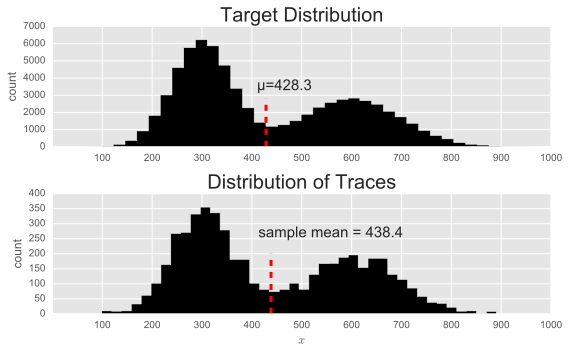

In [17]:
# Plots the target distribution and the distibution of the traces

plt.rcParams['figure.figsize'] = 8, 5
plt.subplot(2,1,1)
plt.hist(target, bins=40, histtype='stepfilled', color='black')
plt.title('Target Distribution', fontsize=20)
plt.ylabel('count')
plt.xlim([0,1000])
plt.xticks(range(100,1001, 100))
plt.text(410,3300, u'µ={:.4}'.format(np.mean(target)), fontsize=15)
plt.axvline(x=np.mean(target), ymax=.4, color='red', linewidth=3, linestyle='--')

plt.subplot(2,1,2)
plt.hist(traces, bins=40, histtype='stepfilled', color='black')
plt.title('Distribution of Traces', fontsize=20)
plt.xlabel('$x$')
plt.ylabel('count')
plt.xlim([0,1000])
plt.xticks(range(100,1001, 100))
plt.text(413,255, u'sample mean = {:.4}'.format(np.mean(traces)), fontsize=15)
plt.axvline(x=np.mean(traces), ymax=.5, color='red',linewidth=3,linestyle='--')

plt.tight_layout()
# plt.savefig('target_and_test.png', format='png', dpi=500)
plt.show()

Not only is the distribution of the traces very close to the actual distribution, the sample mean is also very close. With fewer than 5000 sample points drawn, we are very close to aproximating the shape of the target distribution.